# Linear abosrption and circular dischroism for a single molecular and molecular dimer

## 0.Overview

Each molecule is simplified to have only two states: 
* a ground state $|𝑔⟩$;
* a single excited state $|e⟩$.

Major Parameters:
* The excitation frequency of the single excited state $|ω₀⟩$;
* The magnitude of the transition dipole moment $|μ₀⟩$.

The magnitude of the transition dipole moment also quantifies the strength of the light–matter interaction

The directions of the transition dipoles are given by the unit vectors $e_1$ and $e_2$ for each molecule, respectively. And the direction connecting the centers of two molecules is given by:
$$ \vec{e}_{21} = \frac{\vec{r}_2-\vec{r}_1}{r}$$


## 1.Single Molecule Linear Absorption

A molecule interacts with an incident light field $E₀$ where the electric field oscillates along the X axis and propagates along Z given by:
$$ E(\vec{r},t)=\text{Re}\{E_0\vec{X}e^{i\vec{k}⋅\vec{r}-iωt}\} $$

Here, since the wavelength of light is much larger than the molecular dimensions, the phase factor $e^{i\vec{k}}$ is approximated as 1. The absorption spectrum is derived to have a Lorentzian distribution: 
* The center is at $ω_0$;
​* The width is determined by $𝛾$;
* The intensity of the absorption is proportional to $μ_0^2$.

For the dimer coupling and exciton formation, when two molecules form a dimer, their interaction leads to coupling between their excited states. It is Dipole–Dipole Coupling for two transition dipoles:
$$ V=μ_0^2⋅G$$
Where G is a geometrical factor that depends solely on the relative orientation and distance of the two molecules.

The dimer’s Hamiltonian is constructed in the basis of the two singly excited states (i.e., one molecule excited while the other remains in the ground state). It is represented as a $2\times2$ matrix with diagonal elements:
* The energy of the unperturbed excited state: $ℏω_0$
* Off-diagonal elements: $V$.

Here The diagonalizing this Hamiltonian yields two exciton states: 
* The corresponding to the symmetric (in-phase) combination;
* The antisymmetric (out-of-phase) combination of the single-molecule excitations/

This coupling causes an energy splitting, known as Davydov splitting, with the energies given by
* For in-phase combination: $ℏω_0+V$;
* For out-of-phase combination: $ℏω_0-V$.


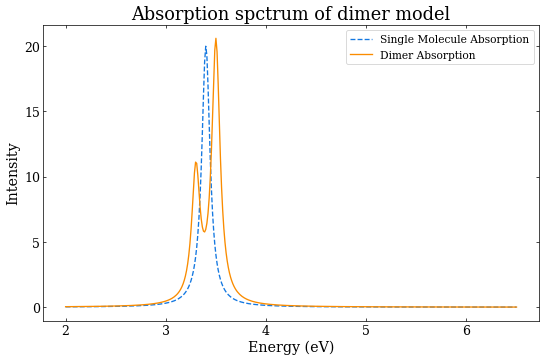

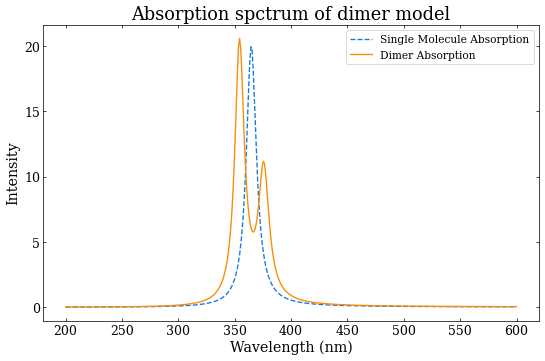

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def lorentzian(x, x0, 𝛾):
    """
    (eqn.5) Calculate the lorentzian distribution:
        lorentzian(x, x0, 𝛾) = 𝛾/((x-x0)^2+𝛾^2)
    𝛾 (float): half-width at half-maximum (HWHM) of the Lorentzian;
    x (array): frequency or energy axis;
    x0 (float): center of the Lorentzian peak.
    """
    return 𝛾/((x-x0)**2+𝛾**2)

def single_molecule_absorption(ℏω, ℏω0, 𝛾, μ0, scale=1.0):
    """
    (eqn.3,.5) Calculate the absorption spectrum of a single molecule:
        scale * μ0^2 * lorentzian(ω, ω0, 𝛾)
      = scale * μ0^2 * 𝛾/((ω-ω0)^2+𝛾^2)
    
    ℏω (array): frequency (energy);
    ℏω0 (float): resonance frequency of the molecule;
    𝛾 (float): linewidth (HWHM) of the Lorentzian profile.
    μ0 (float): Magnitude of the transition dipole moment.
    scale (float): A scaling factor for intensity (default 1.0).
        
    Returns (array): absorption intensity as a function of ℏω.
    """
    # Absorption intensity is proportional to μ0^2 * Lorentzian(ℏω, ℏω0, 𝛾)
    intensity = scale * μ0**2 * lorentzian(ℏω, ℏω0, γ)
    return intensity

def dimer_coupling(μ0, G):
    """
    (eqn.7) Calculate the dipole-dipole coupling between two molecules:
        V = μ0^2*G
    μ0 (float): magnitude of the transition dipole moment.
    G (float): geometrical factor depending on the relative orientation and distance.
    Returns (float): coupling constant V.
    """
    return μ0**2 * G

def dimer_energies(ℏω0, V):
    """
    (eqn.6) Calcute the energies of the dimer exciton states.
        H = [ℏω0 V; V ℏω0]
    ℏω0 (float): resonance frequency of a single molecule.
    V (float): coupling constant between the molecules.

    Returns: (tuple of float):
        (ℏω_0+V, ℏω_0-V)
    """
    energy_sym = ℏω0 + V     # in-phase (symmetric) combination
    energy_anti = ℏω0 - V    # out-of-phase (antisymmetric) combination
    return energy_sym, energy_anti

def dimer_absorption_spectrum(ℏω, ℏω0, 𝛾, μ0, G, intensity_ratio=(1.0, 0.5)):
    """
    (eqn.9) Calculate the absorption spectrum of the dimer.

    ℏω (array): frequency (or energy) values.
    ℏω0 (float): single molecule resonance frequency.
    𝛾 (float): linewidth (HWHM) of each Lorentzian peak.
    μ0 (float): transition dipole moment magnitude.
    G (float): geometrical factor for coupling.
    intensity_ratio (tuple): relative intensity factors for the symmetric and antisymmetric states.
    Returns (tuple): (Total absorption spectrum, symmetric state contribution, antisymmetric state contribution)
    """
    V = dimer_coupling(μ0, G)
    energy_sym, energy_anti = dimer_energies(ℏω0, V)

    # Each exciton state's contribution is modeled as a Lorentzian peak
    absorption_sym = intensity_ratio[0] * lorentzian(ℏω, energy_sym, 𝛾)
    absorption_anti = intensity_ratio[1] * lorentzian(ℏω, energy_anti, 𝛾)

    total_absorption = absorption_sym + absorption_anti
    return total_absorption, absorption_sym, absorption_anti

# Absorption spectrum versus photon energy 
if __name__ == "__main__":
    # Define the frequency (or energy) axis, for example in eV
    ℏω = np.linspace(2, 6.5, 400)

    # Define model parameters
    ℏω0 = 3.4       # Resonance frequency of a single molecule (eV)
    𝛾 = 0.05        # Linewidth (eV)
    μ0 = 1.0        # Transition dipole moment magnitude (arbitrary units)
    G = 0.1         # Geometrical factor for coupling (arbitrary units)
    intensity_ratio = (1.0, 0.5)

    # Calculate single molecule absorption spectrum
    absorption_single = single_molecule_absorption(ℏω, ℏω0, 𝛾, μ0)

    # Calculate dimer absorption spectrum
    absorption_dimer, abs_sym, abs_anti = dimer_absorption_spectrum(ℏω, ℏω0, 𝛾, μ0, G, intensity_ratio)

    # Figure settings
    plt.figure(figsize=(10, 6), dpi=64)
    params = {"text.usetex": False, "font.family": "serif", "mathtext.fontset": "cm", "axes.titlesize": 20, "axes.labelsize": 16,
              "xtick.labelsize": 14, "ytick.labelsize": 14, "legend.fontsize": 12, "figure.facecolor": "w"}
    plt.rcParams.update(params)
    plt.tick_params(direction="in", which="both", top=True, right=True, bottom=True, left=True)

    # Plot the spectrum
    plt.plot(ℏω, absorption_single, color = "#1478E1", linestyle="--", label="Single Molecule Absorption")
    plt.plot(ℏω, absorption_dimer, color = "#FA8C00", label="Dimer Absorption")
    plt.xlabel("Energy (eV)")
    plt.ylabel("Intensity")
    plt.title("Absorption spctrum of dimer model")
    plt.legend()
    plt.show()

# Absorption spectrum versus photon wavelength
if __name__ == "__main__":
    # Define wavelength range (in nm)
    λ = np.linspace(200, 600, 400)      # Wavelength array from 200 nm to 600 nm

    # Convert wavelength to photon energy using E (eV) ≈ 1240 / λ (nm)
    ℏω = 1240 / λ  # Photon energy in eV

    # Define model parameters
    ℏω0 = 3.4       # Resonance energy of a single molecule (eV)
    𝛾 = 0.05        # Linewidth (eV)
    μ0 = 1.0        # Transition dipole moment magnitude (arbitrary units)
    G = 0.1         # Geometrical factor for coupling (arbitrary units)
    intensity_ratio = (1.0, 0.5)
    
    # Calculate absorption spectra using your defined functions
    absorption_single = single_molecule_absorption(ℏω, ℏω0, 𝛾, μ0)
    absorption_dimer, _, _ = dimer_absorption_spectrum(ℏω, ℏω0, 𝛾, μ0, G, intensity_ratio)
    
    # Figure settings
    plt.figure(figsize=(10, 6), dpi=64)
    params = {"text.usetex": False, "font.family": "serif", "mathtext.fontset": "cm", "axes.titlesize": 20, "axes.labelsize": 16,
              "xtick.labelsize": 14, "ytick.labelsize": 14, "legend.fontsize": 12, "figure.facecolor": "w"}
    plt.rcParams.update(params)
    plt.tick_params(direction="in", which="both", top=True, right=True, bottom=True, left=True)

    # Plot the spectra with wavelength (nm) as the x-axis
    plt.plot(λ, absorption_single, '--', color="#1478E1", label="Single Molecule Absorption")
    plt.plot(λ, absorption_dimer, color="#FA8C00", label="Dimer Absorption")
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Intensity")
    plt.title("Absorption spctrum of dimer model")
    plt.legend()
    plt.show()


## 2.Circular Dichroism in the Dimer

Circular dichroism is defined as the difference between the absorption coefficients for left-handed and right-handed circularly polarized light:
$$ Δε=ε^{+}-ε^{-} $$

About the term $e^{i\vec{k}⋅\vec{r}}$, under the pure dipole (long-wavelength) approximation, the left and right circularly polarized fields are conjugate to each other, and the calculated CD signal would vanish.

To obtain a nonzero CD signal, the approximation must be relaxed to include the first-order term in the expansion of $e^{vec{k}⋅\vec{r}}$ This additional term introduces subtle differences in how the two exciton states interact with left- and right-handed circularly polarized light.

As a result, the CD spectrum consists of two Lorentzian peaks with opposite signs—one positive and one negative—which reflects the intrinsic chirality arising from the specific molecular arrangement.

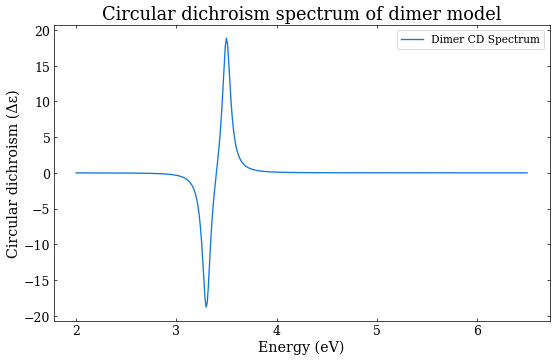

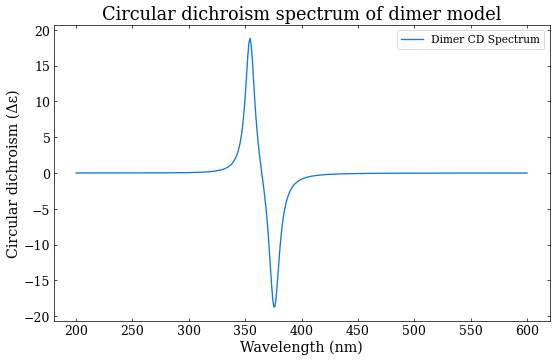

In [2]:
def dimer_cd_spectrum(ω, ω0, 𝛾, μ0, G, CD_factor=1.0):
    """
    (eqn.32) Calculate the circular dichroism (CD) spectrum for the dimer.
    CD_factor (float): A scaling factor for the CD intensity.
    Returns (array): The CD spectrum, modeled as the difference between the Lorentzian contributions of the symmetric and antisymmetric exciton states.
    """
    V = dimer_coupling(μ0, G)
    energy_sym, energy_anti = dimer_energies(ω0, V)
    
    # Compute Lorentzian profiles for both states
    cd_sym = lorentzian(ω, energy_sym, 𝛾)
    cd_anti = lorentzian(ω, energy_anti, 𝛾)
    
    # The CD signal is the difference between the two contributions, scaled by CD_factor
    cd_signal = CD_factor * (cd_sym - cd_anti)
    return cd_signal

# Circular dichroism versus photon energy 
if __name__ == "__main__":
    # Define energy axis (in eV)
    ω = np.linspace(2, 6.5, 400)
    
    # Model parameters
    ω0 = 3.4       # Resonance energy of a single molecule (eV)
    𝛾 = 0.05       # Linewidth (eV)
    μ0 = 1.0       # Transition dipole moment magnitude (arbitrary units)
    G = 0.1        # Geometrical factor for coupling (arbitrary units)
    CD_factor = 1.0  # Scaling factor for CD intensity
    
    # Calculate the dimer CD spectrum using the provided function
    cd_spectrum = dimer_cd_spectrum(ω, ω0, 𝛾, μ0, G, CD_factor)

    # Figure settings
    plt.figure(figsize=(10, 6), dpi=64)
    params = {"text.usetex": False, "font.family": "serif", "mathtext.fontset": "cm", "axes.titlesize": 20, "axes.labelsize": 16,
              "xtick.labelsize": 14, "ytick.labelsize": 14, "legend.fontsize": 12, "figure.facecolor": "w"}
    plt.rcParams.update(params)
    plt.tick_params(direction="in", which="both", top=True, right=True, bottom=True, left=True)

    # Plot the CD spectrum
    plt.plot(ω, cd_spectrum, color="#1478E1", label="Dimer CD Spectrum")
    plt.xlabel("Energy (eV)")
    plt.ylabel("Circular dichroism (Δε)")
    plt.title("Circular dichroism spectrum of dimer model")
    plt.legend()
    plt.show()

# Circular dichroism versus photon wavelength
if __name__ == "__main__":
    # Define wavelength range (in nm)
    λ = np.linspace(200, 600, 400)  # Wavelength array from 200 nm to 600 nm

    # Convert wavelength to photon energy using E (eV) ≈ 1240 / λ (nm)
    ℏω = 1240 / λ  # Photon energy in eV

    # Define model parameters
    ω0 = 3.4       # Resonance energy of a single molecule (eV)
    𝛾 = 0.05       # Linewidth (eV)
    μ0 = 1.0       # Transition dipole moment magnitude (arbitrary units)
    G = 0.1        # Geometrical factor for coupling (arbitrary units)
    CD_factor = 1.0  # Scaling factor for CD intensity

    # Calculate the dimer CD spectrum using photon energy as the variable
    cd_spectrum = dimer_cd_spectrum(ℏω, ω0, 𝛾, μ0, G, CD_factor)

    # Figure settings
    plt.figure(figsize=(10, 6), dpi=64)
    params = {"text.usetex": False, "font.family": "serif", "mathtext.fontset": "cm", "axes.titlesize": 20, "axes.labelsize": 16,
              "xtick.labelsize": 14, "ytick.labelsize": 14, "legend.fontsize": 12, "figure.facecolor": "w"}
    plt.rcParams.update(params)
    plt.tick_params(direction="in", which="both", top=True, right=True, bottom=True, left=True)

    # Plot the CD spectrum with wavelength as the x-axis
    plt.plot(λ, cd_spectrum, color="#1478E1", label="Dimer CD Spectrum")
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Circular dichroism (Δε)")
    plt.title("Circular dichroism spectrum of dimer model")
    plt.legend()
    plt.show()
